# Titanic Dataset

In [536]:
import pandas as pd
import numpy as np
Location = "datasets/titanic3.xls"
df = pd.read_excel(Location)

In [537]:
df.head()
#Show the first 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [538]:
df = df.drop(['ticket','cabin'], axis=1)
#dropping the columns for "ticket" and "cabin", will not likely be useful in analysis
#axis=1 indicates that this is a column

In [539]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.5500,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,0.0000,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,49.5042,C,NaN,22.0,"Montevideo, Uruguay"


In [540]:
#The NaN values may get in the way of analysis when using datatypes:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Basic logic suggests that if we drop NaN values from our data, we will get an empty dataframe because there is an NaN in every index. There will be an NaN for those who survived, under 'Body' whereas those who did not survive will have an NaN under 'Boat'. Originally I intended to fill the NaN values with 0 but found that it distorted the data. 

While it appeared that there is a disproportionate amount of younger passengers, the reality was that there were several unknown (NaN) values for the ages of people, which made them appear to be "0" and were thus placed in that bin during visualistion. Therefore missing values were left as NaN.

In [541]:
import matplotlib.pyplot as plt
%matplotlib inline
#For presenting graphs and analysing data visually

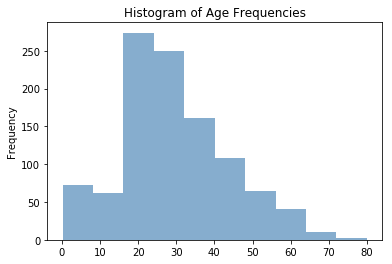

In [542]:
#Creating a histogram of the age distribution.
df['age'].plot(kind='hist', color='steelblue', alpha=.65)
plt.title("Histogram of Age Frequencies")

It appears that in our dataset we have a __mildly right skewed__ distribution. There are more younger passengers (20s to 30s) than older passengers (50+). 

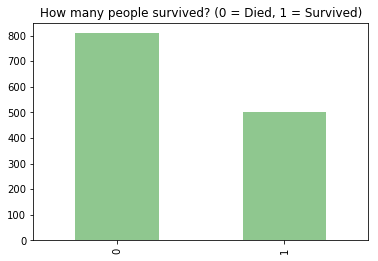

In [543]:
df['survived'].value_counts().plot(kind='bar', color="green",alpha=.44)
plt.title("How many people survived? (0 = Died, 1 = Survived)")

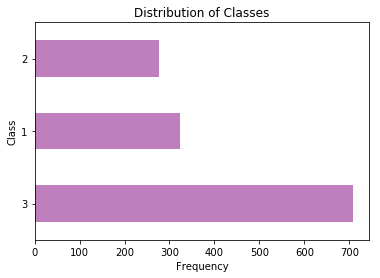

In [544]:
df.pclass.value_counts().plot(kind="barh", color='purple', alpha=.5)
plt.title("Distribution of Classes")
plt.xlabel("Frequency")
plt.ylabel("Class")

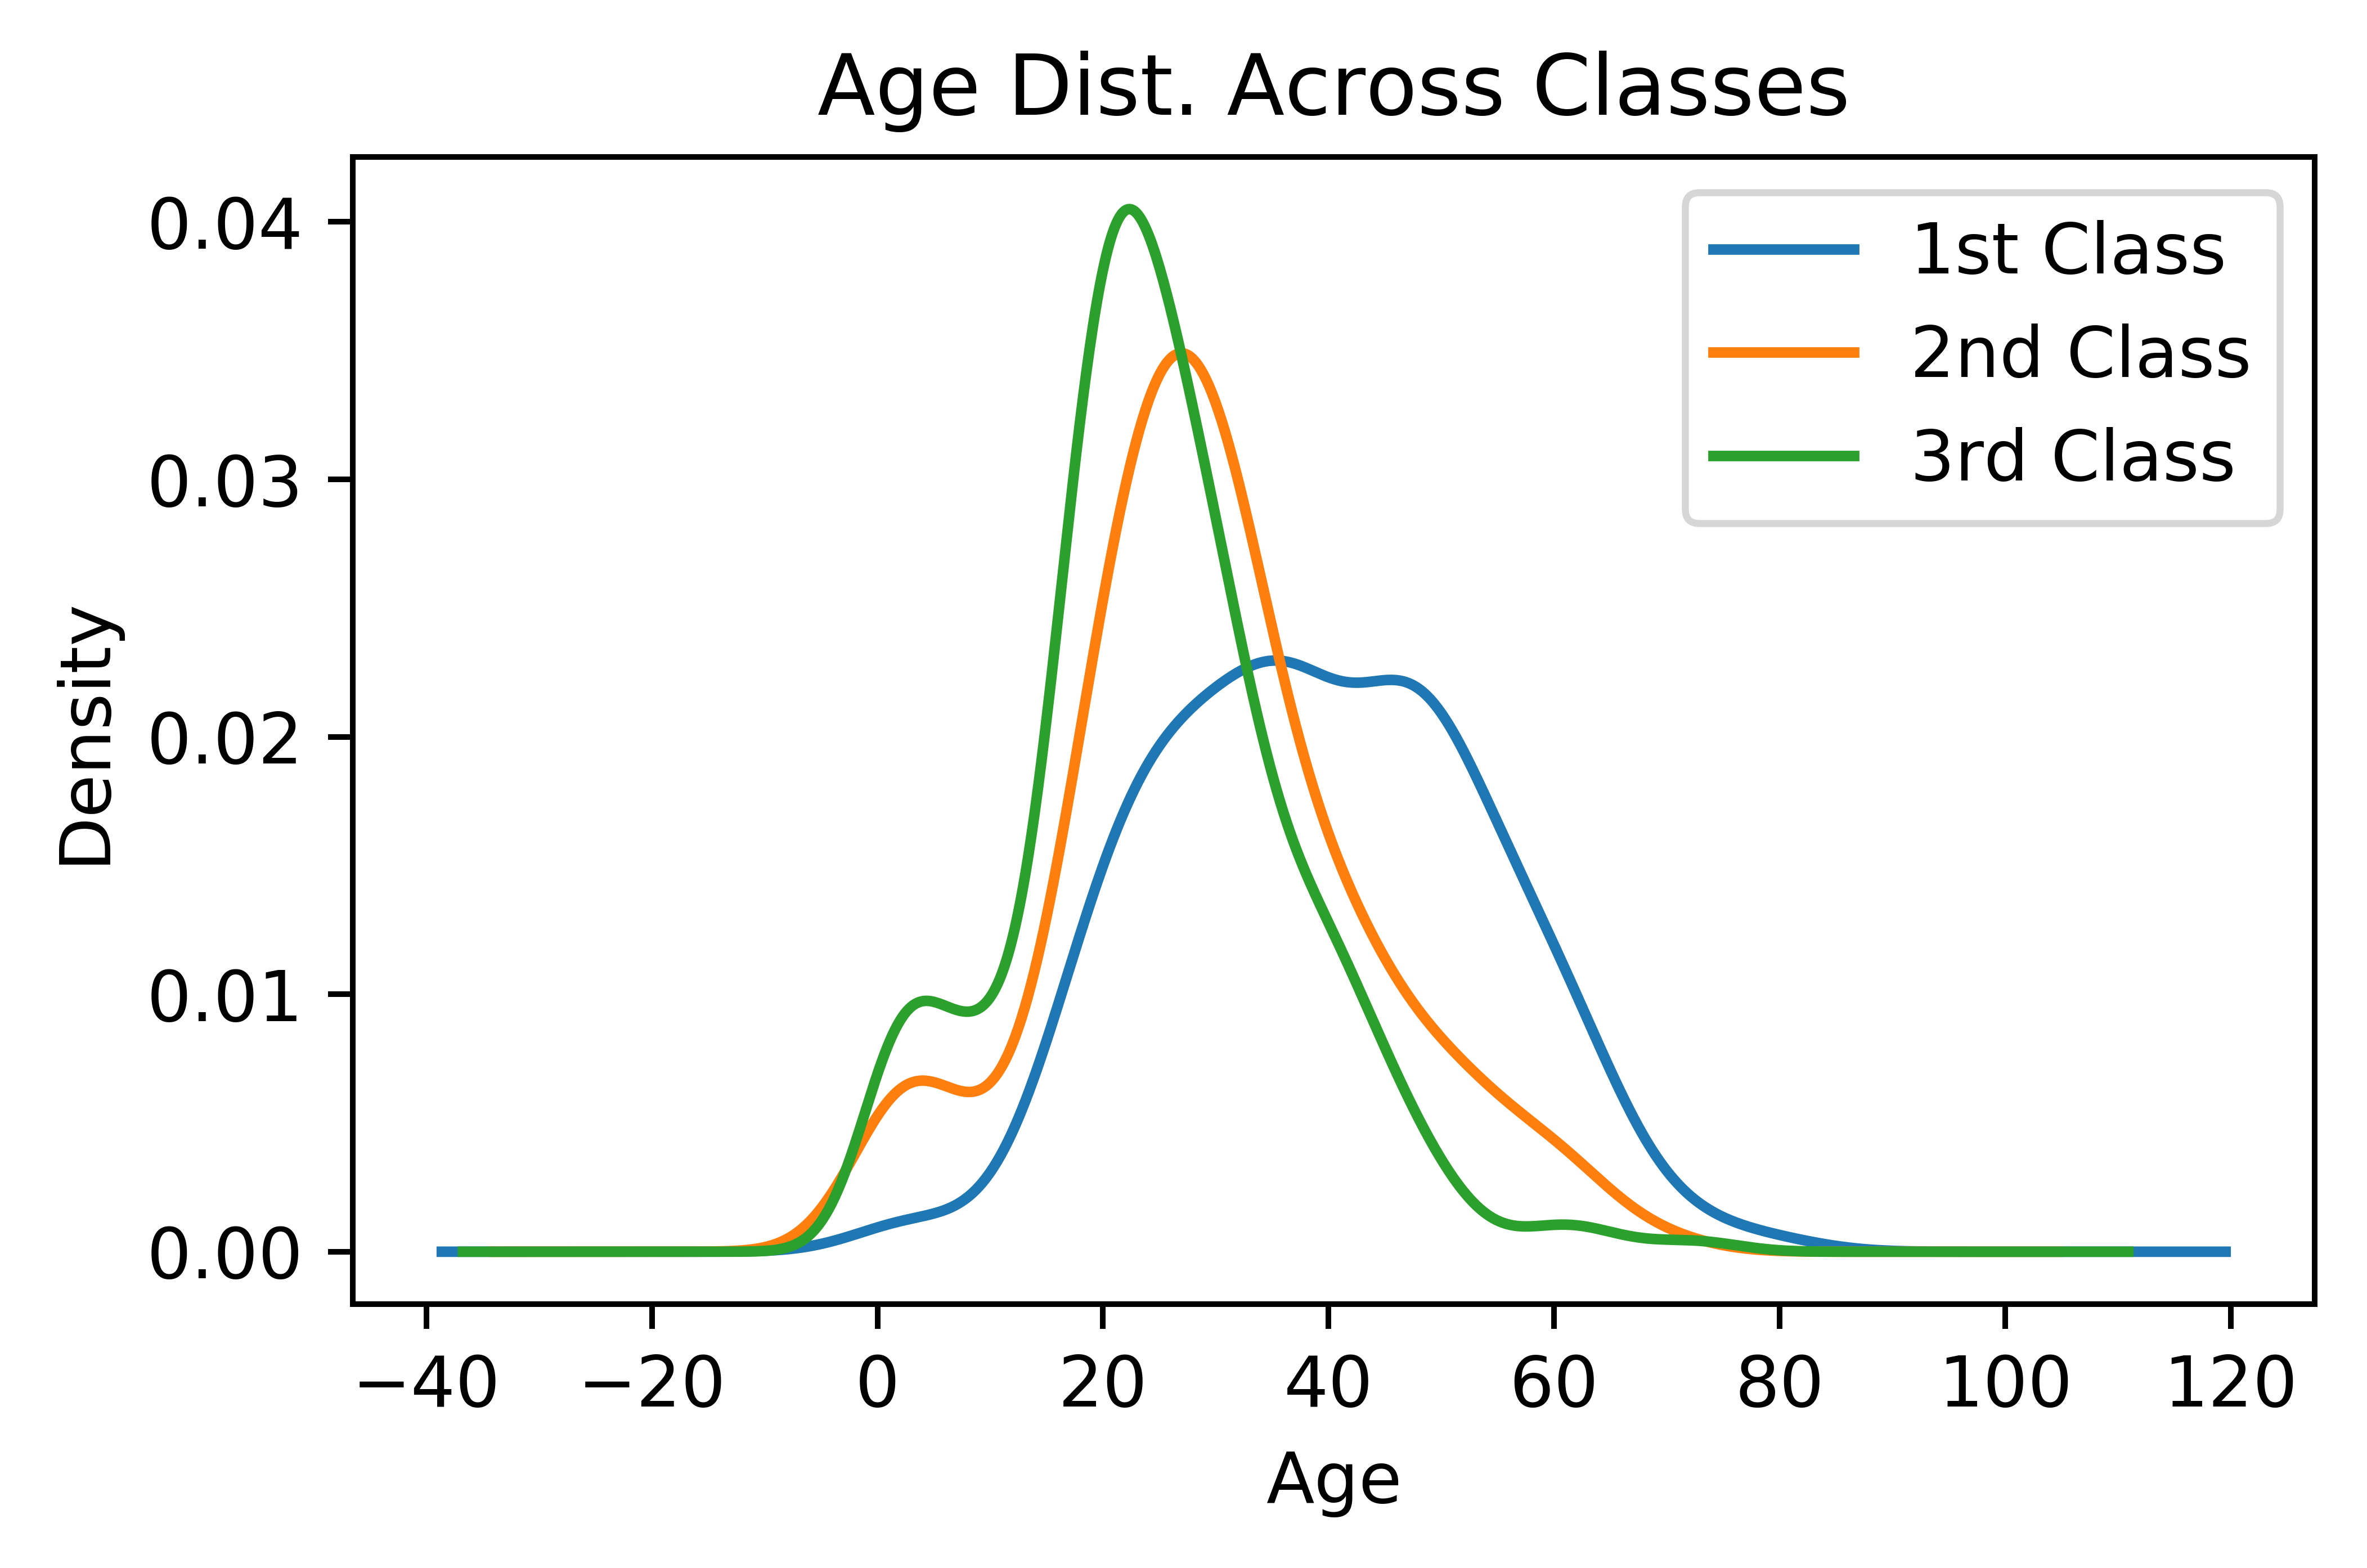

In [545]:
#Now we explore the distribution of ages across classes.
#I chose the distribution plot over the histogram because I wanted to overlay their shapes onto one graph.
#I found this to be most appropriate.
figure332 = plt.figure(figsize=(5,3),dpi=900)
df.age[df.pclass == 1].plot(kind='kde')
df.age[df.pclass == 2].plot(kind='kde')
df.age[df.pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.legend(('1st Class', '2nd Class','3rd Class')) 
plt.title("Age Dist. Across Classes")

Now that we have a general look at the basics as well as ages across the three classes, let's break it down further by gender and class.

[<matplotlib.text.Text at 0x3bb583ac8>, <matplotlib.text.Text at 0x3bb78af28>]

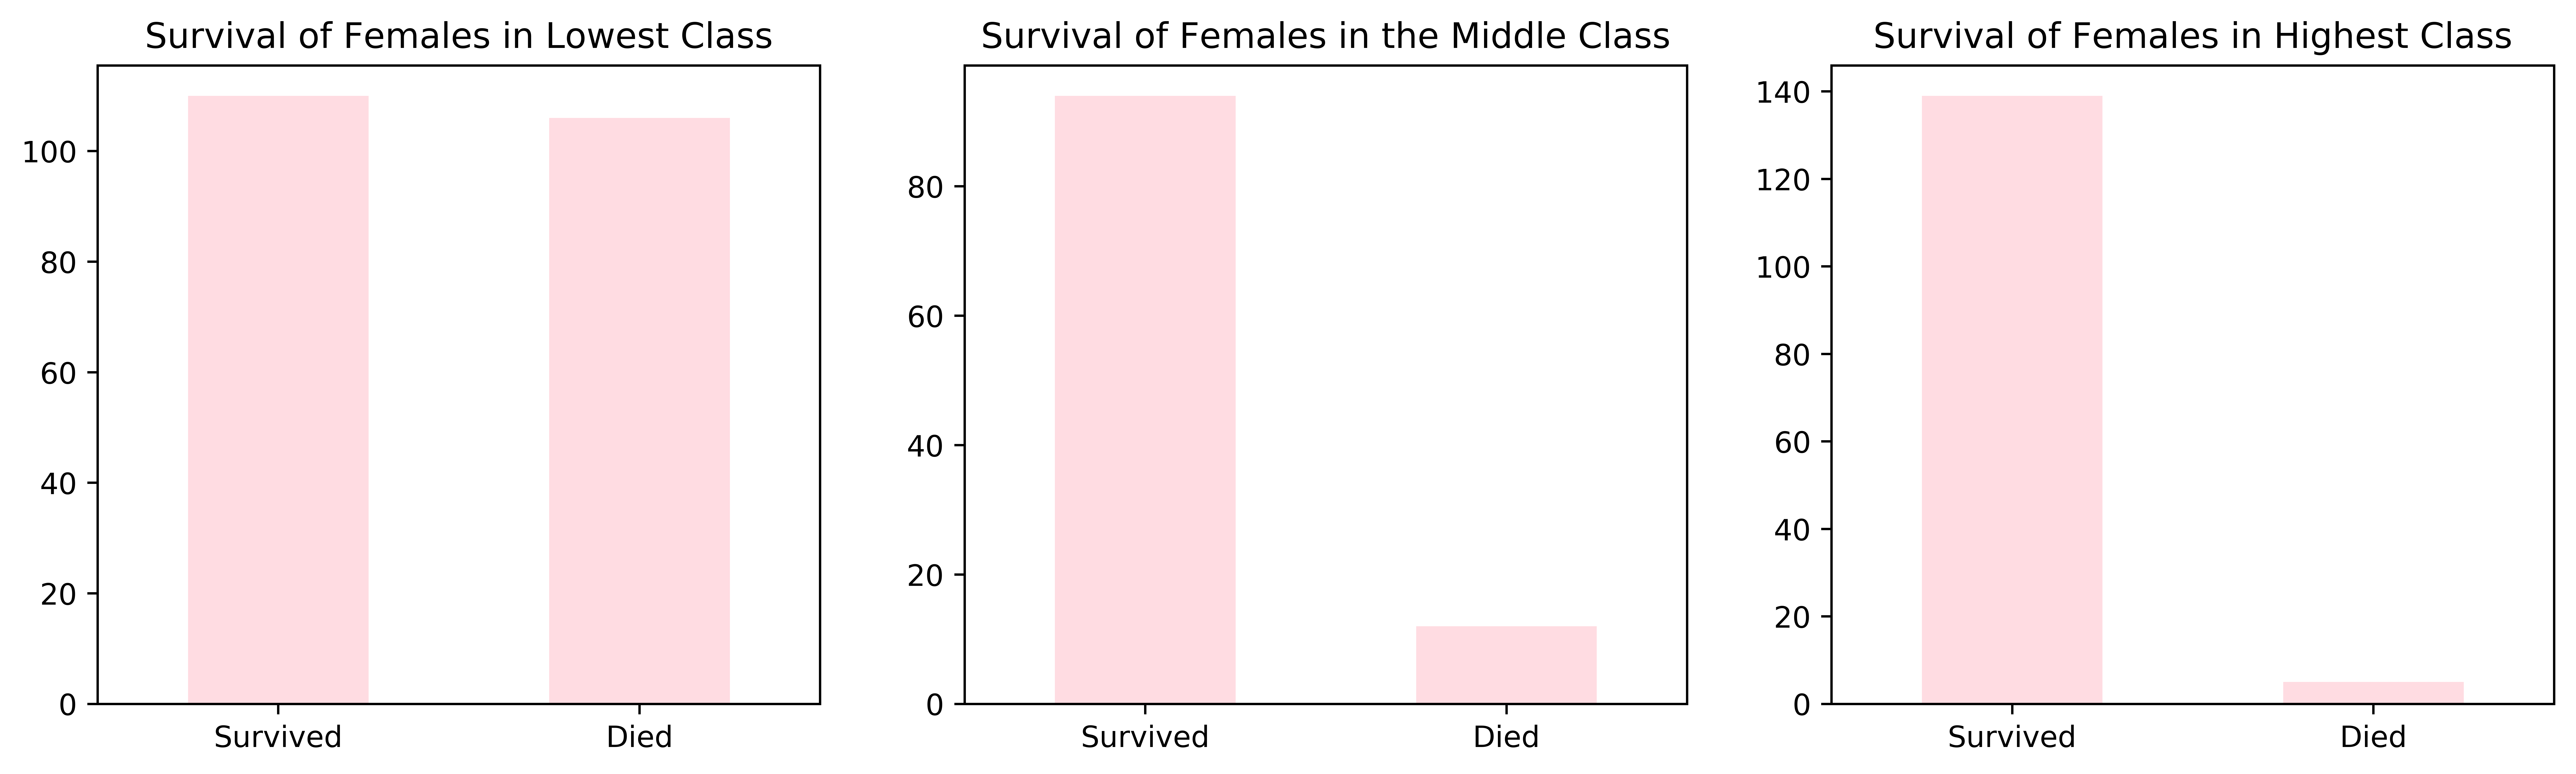

In [546]:
figure1 = plt.figure(figsize=(15,4),dpi=900)
#Creation of a figure, so we can compare the graphs side by side.

#How do we use figures? We've made a plot that is 15 inches by 4 inches, with 900 dots per inch.
#First we would like to look at the survival rate of the low class females, from Class 3.

#Subplot essentially says, make a plot that is 1 row, with 3 columns. Now put this in the 1st spot. And soforth.
#We use this to compare survival rates side by side.
ax = figure1.add_subplot(131)
femalelow = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
femalelow.plot(kind='bar', color='pink', alpha=.55)
plt.title("Survival of Females in Lowest Class")
ax.set_xticklabels(['Survived', 'Died'], rotation=0)

#Now we would like to see the survival rate of the higher class women, from Class 1.
ax2 = figure1.add_subplot(133)
female_highclass = df.survived[df.sex == 'female'][df.pclass == 1].value_counts()
female_highclass.plot(kind='bar', color='pink', alpha=.55)
plt.title("Survival of Females in Highest Class")
ax2.set_xticklabels(['Survived', 'Died'], rotation=0)

ax3 = figure1.add_subplot(132)
femmidclass = df.survived[df.sex == 'female'][df.pclass == 2].value_counts()
femmidclass.plot(kind='bar', color='pink', alpha=.55)
plt.title("Survival of Females in the Middle Class")
ax3.set_xticklabels(['Survived', 'Died'], rotation=0)

[<matplotlib.text.Text at 0x3bbd41898>, <matplotlib.text.Text at 0x3bbbcc588>]

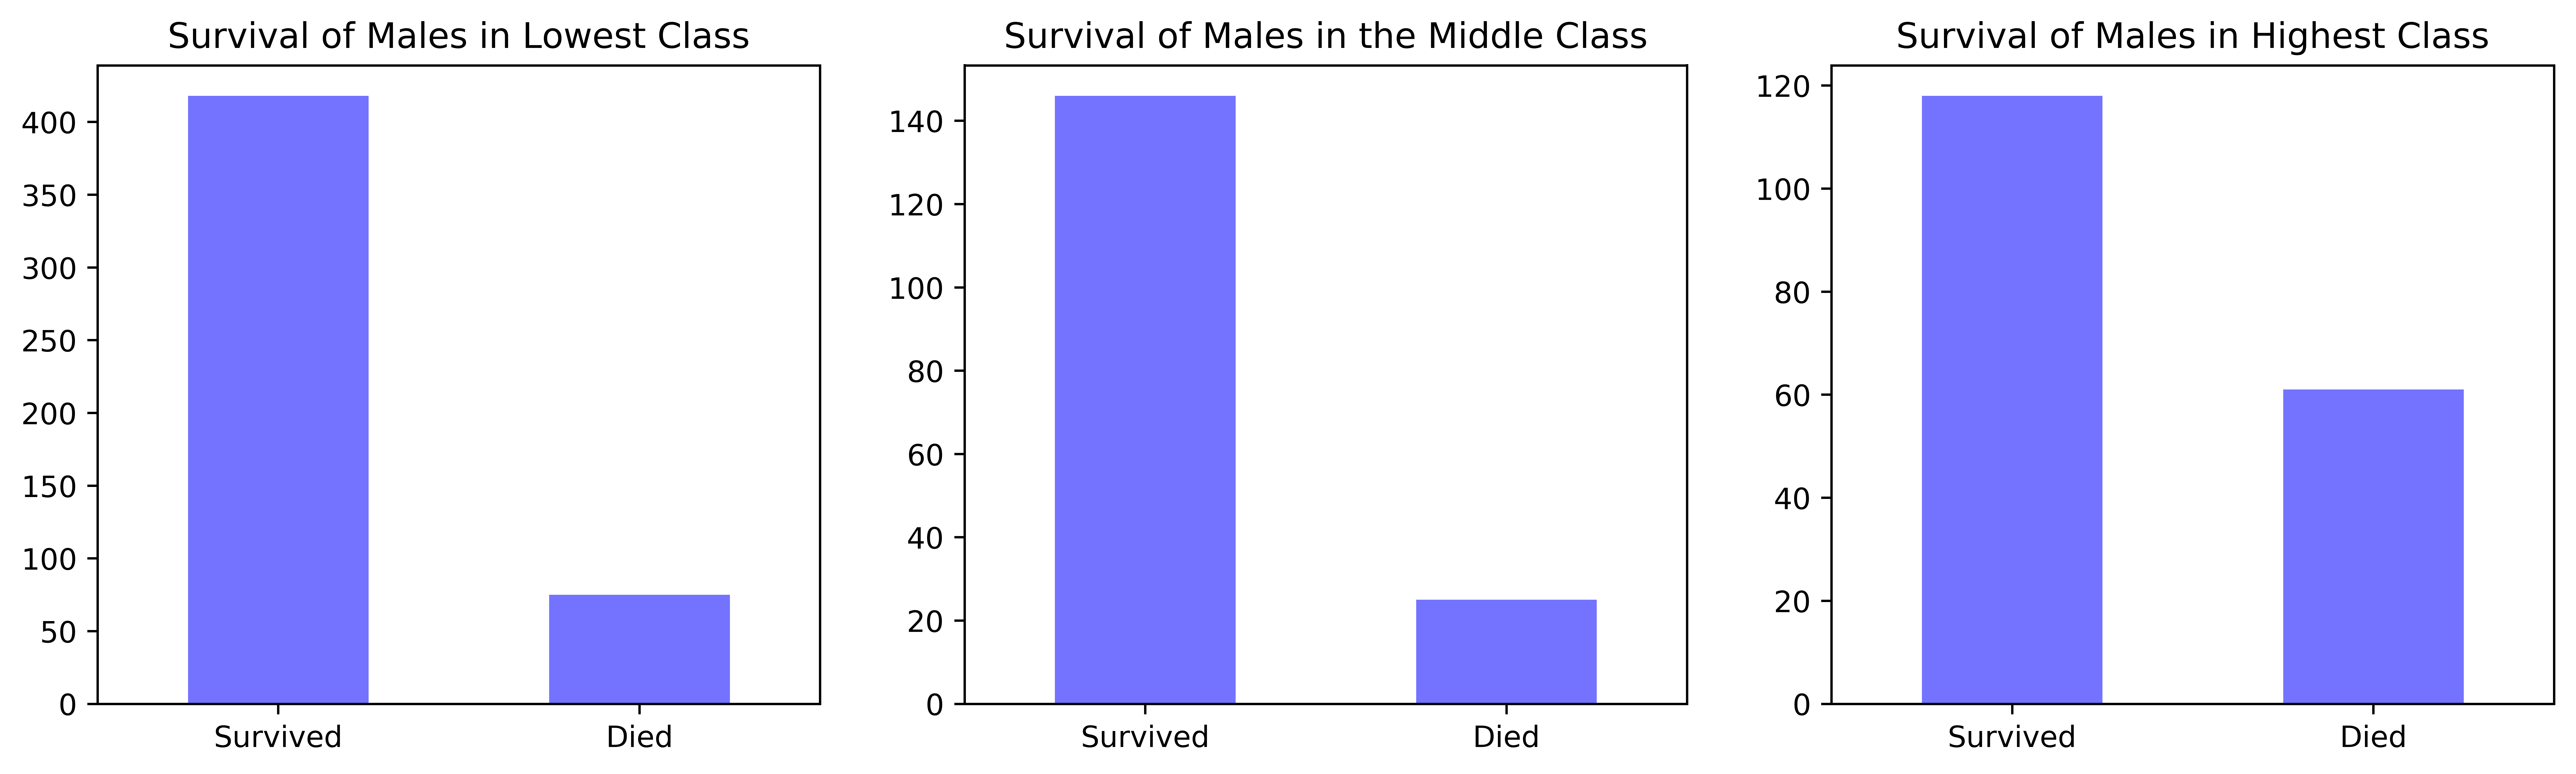

In [547]:
figure2 = plt.figure(figsize=(15,4),dpi=900)

ax4 = figure2.add_subplot(131)
malelow = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
malelow.plot(kind='bar', color='blue', alpha=.55)
plt.title("Survival of Males in Lowest Class")
ax4.set_xticklabels(['Survived', 'Died'], rotation=0)

ax5 = figure2.add_subplot(133)
malehigh = df.survived[df.sex == 'male'][df.pclass == 1].value_counts()
malehigh.plot(kind='bar', color='blue', alpha=.55)
plt.title("Survival of Males in Highest Class")
ax5.set_xticklabels(['Survived', 'Died'], rotation=0)

ax6 = figure2.add_subplot(132)
malemidclass = df.survived[df.sex == 'male'][df.pclass == 2].value_counts()
malemidclass.plot(kind='bar', color='blue', alpha=.55)
plt.title("Survival of Males in the Middle Class")
ax6.set_xticklabels(['Survived', 'Died'], rotation=0)

Now, let's compare them side by side.

In [548]:
figure3 = plt.figure(figsize=(15,8),dpi=900)
#Creation of a figure, so we can compare the graphs side by side.

#How do we use figures? We've made a plot that is 15 inches by 4 inches, with 900 dots per inch.
#First we would like to look at the survival rate of the low class females, from Class 3.

#Subplot essentially says, make a plot that is 1 row, with 3 columns. Now put this in the 1st spot. And soforth.
#We use this to compare survival rates side by side.
ax = figure3.add_subplot(231)
femalelow = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
femalelow.plot(kind='bar', color='pink', alpha=.35)
plt.title("Survival of Females in Lowest Class")
ax.set_xticklabels(['Died', 'Survived'], rotation=0)


#Now we would like to see the survival rate of the higher class women, from Class 1.
ax2 = figure3.add_subplot(233)
female_highclass = df.survived[df.sex == 'female'][df.pclass == 1].value_counts()
female_highclass.plot(kind='bar', color='pink', alpha=.95)
plt.title("Survival of Females in Highest Class")
ax2.set_xticklabels(['Survived', 'Died'], rotation=0)

ax3 = figure3.add_subplot(232)
femmidclass = df.survived[df.sex == 'female'][df.pclass == 2].value_counts()
femmidclass.plot(kind='bar', color='pink', alpha=.65)
plt.title("Survival of Females in the Middle Class")
ax3.set_xticklabels(['Survived', 'Died'], rotation=0)

ax4 = figure3.add_subplot(234)
malelow = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
malelow.plot(kind='bar', color='blue', alpha=.35)
plt.title("Survival of Males in Lowest Class")
ax4.set_xticklabels(['Died', 'Survived'], rotation=0)

ax5 = figure3.add_subplot(236)
malehigh = df.survived[df.sex == 'male'][df.pclass == 1].value_counts()
malehigh.plot(kind='bar', color='blue', alpha=.95)
plt.title("Survival of Males in Highest Class")
ax5.set_xticklabels(['Died', 'Survived'], rotation=0)

ax6 = figure3.add_subplot(235)
malemidclass = df.survived[df.sex == 'male'][df.pclass == 2].value_counts()
malemidclass.plot(kind='bar', color='blue', alpha=.65)
plt.title("Survival of Males in the Middle Class")
ax6.set_xticklabels(['Died', 'Survived'], rotation=0)

[<matplotlib.text.Text at 0x3c602aeb8>, <matplotlib.text.Text at 0x3c609ab70>]

Nice! Well, not nice. But we can clearly see that males were indeed significantly more likely to die than make it onto the lifeboats. Watch out, as the labels are different on each graph. In some instances, "Died" is the first label and in others "Survived" is the first label.

In [549]:
print "The average age of a passenger was:"
print df['age'].mean()
print "Given this, let's have a quick look at the survival rates based on the age of a passenger."

The average age of a passenger was:
29.8811345124
Given this, let's have a quick look at the survival rates based on the age of a passenger.


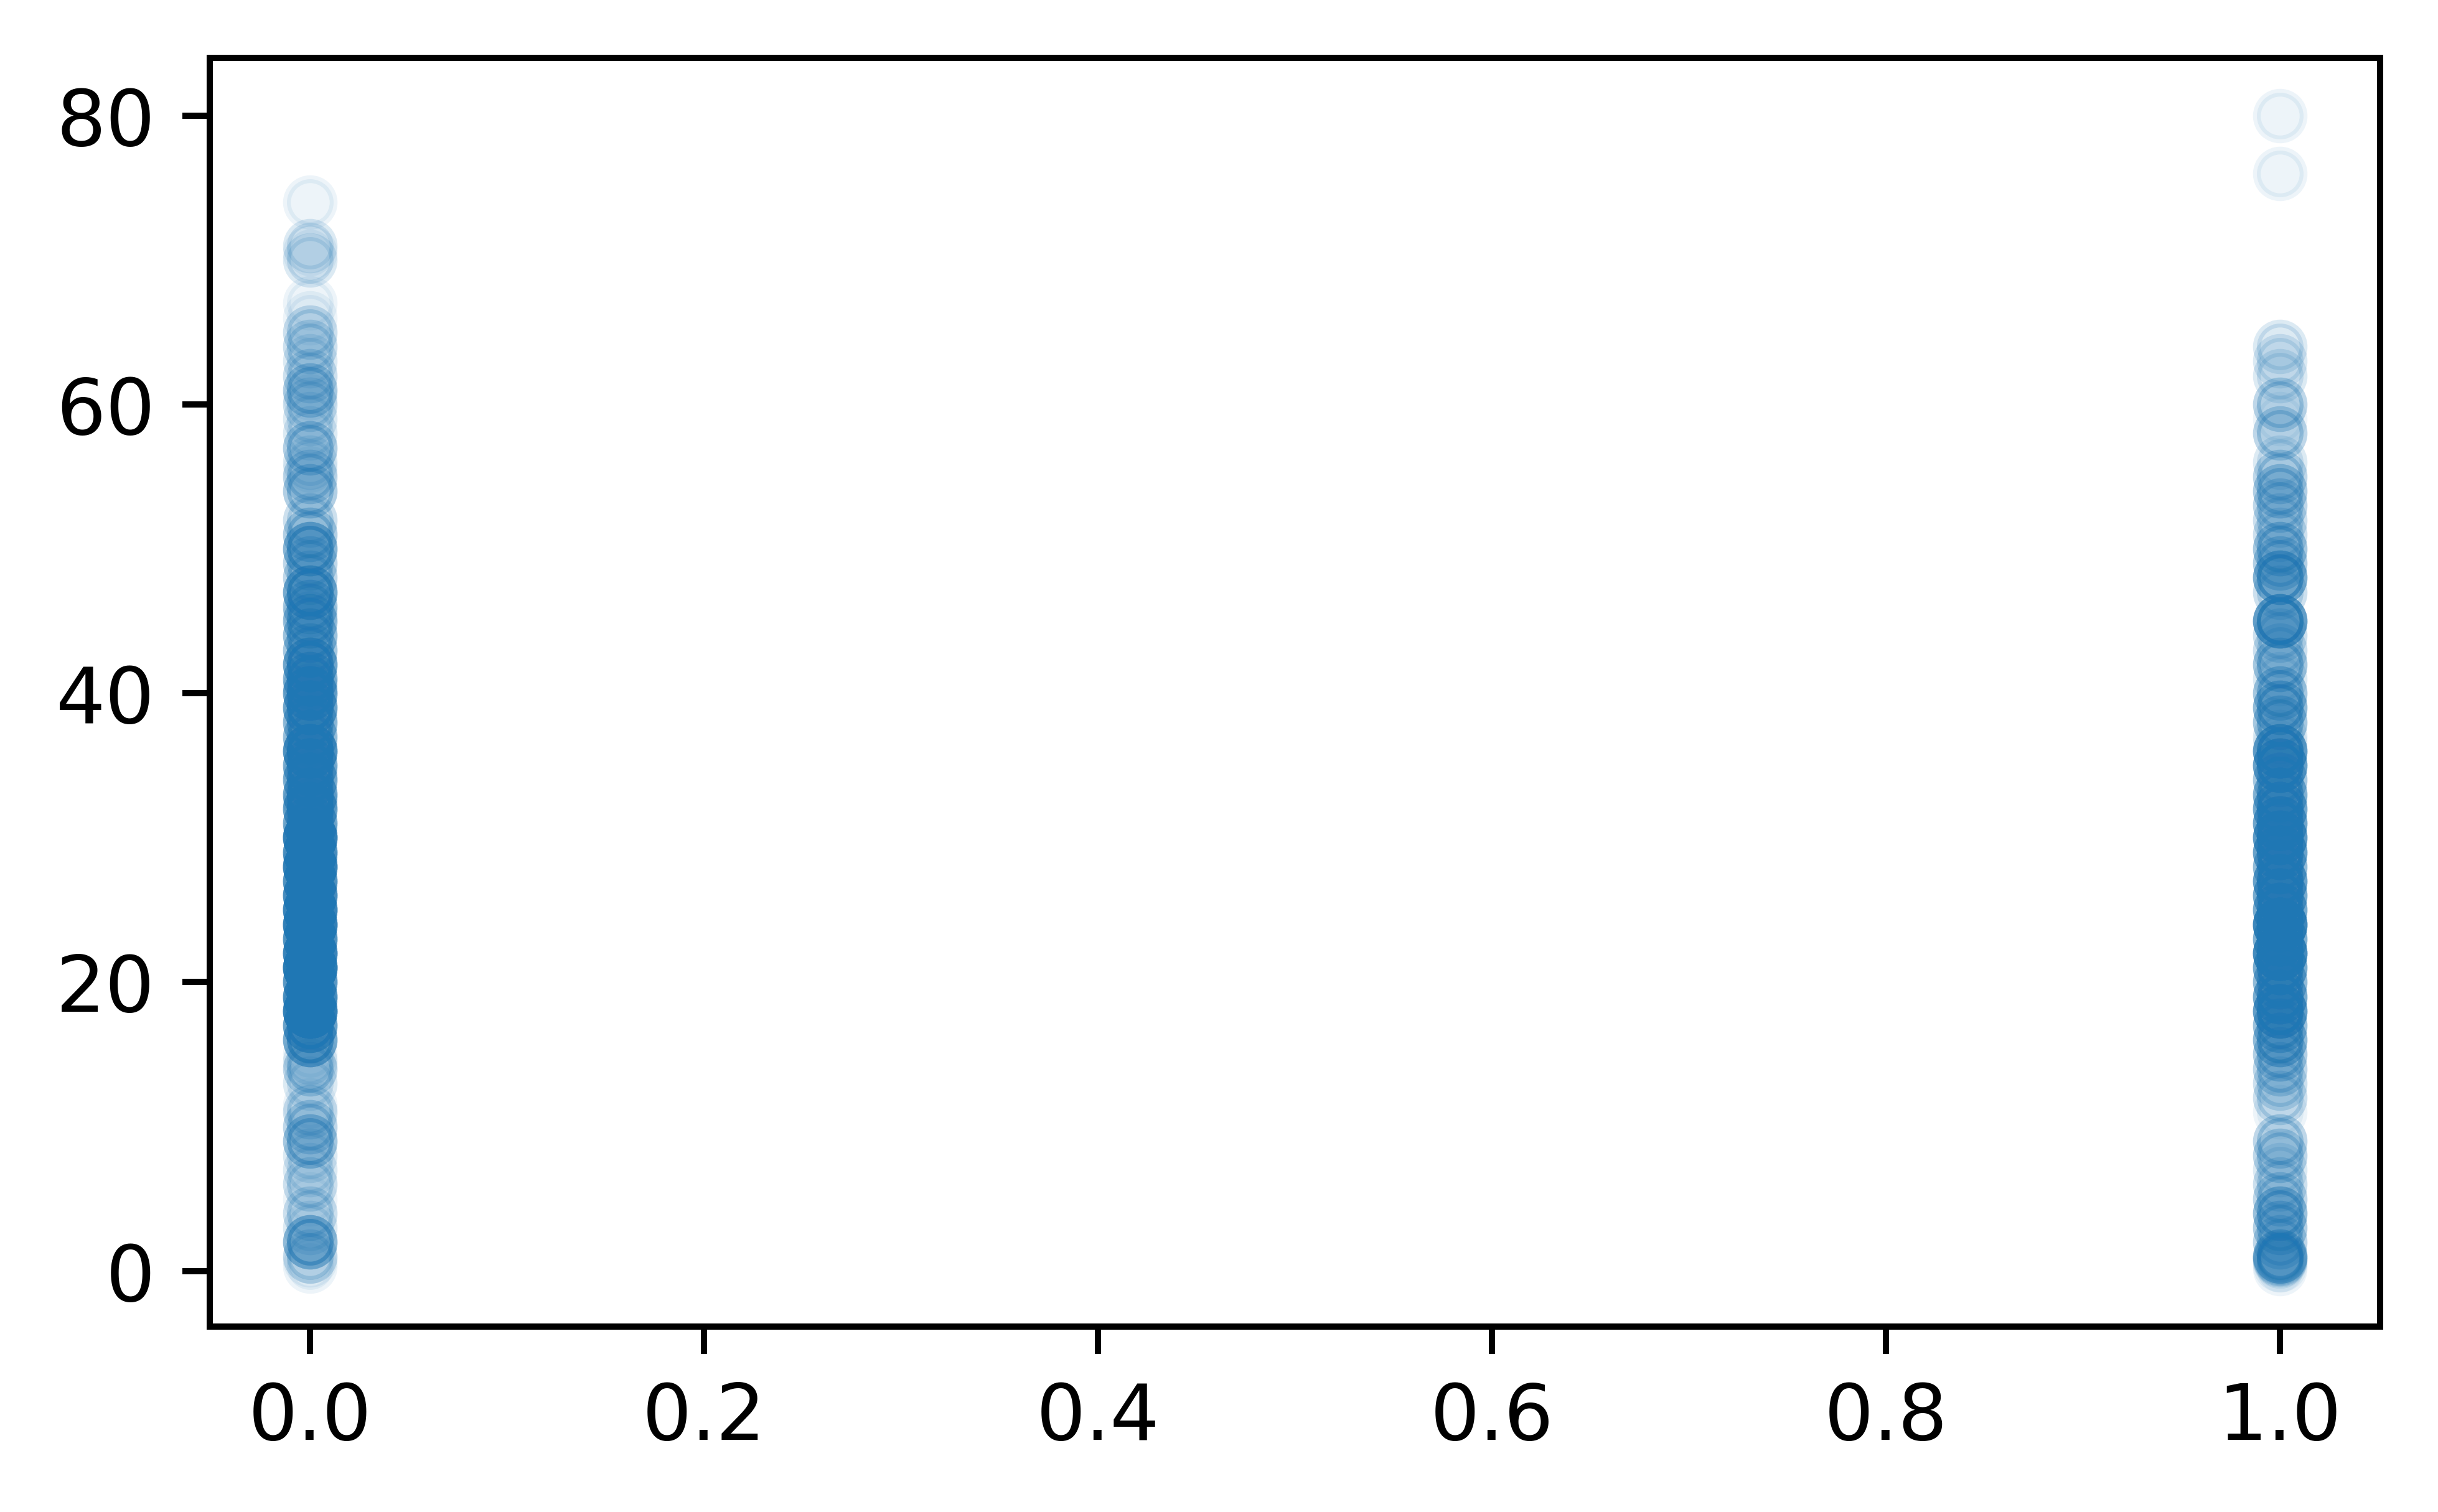

In [550]:
figurenew = plt.figure(figsize=(5,3),dpi=900)
plt.scatter(df.survived, df.age, alpha=.08)

At least at first glance there aren't any massive disparities. If one looks closely they can see the higher distribution of clustering people under about 40 who are surviving. In other words, the variation doesn't look so large. We can see a wider sort of distribution looking at the "death" side. Those who died concentrate from ages 18-50. We can also observe the higher concentration of youth surviving, just slightly. Another graph would provide much greater insight.

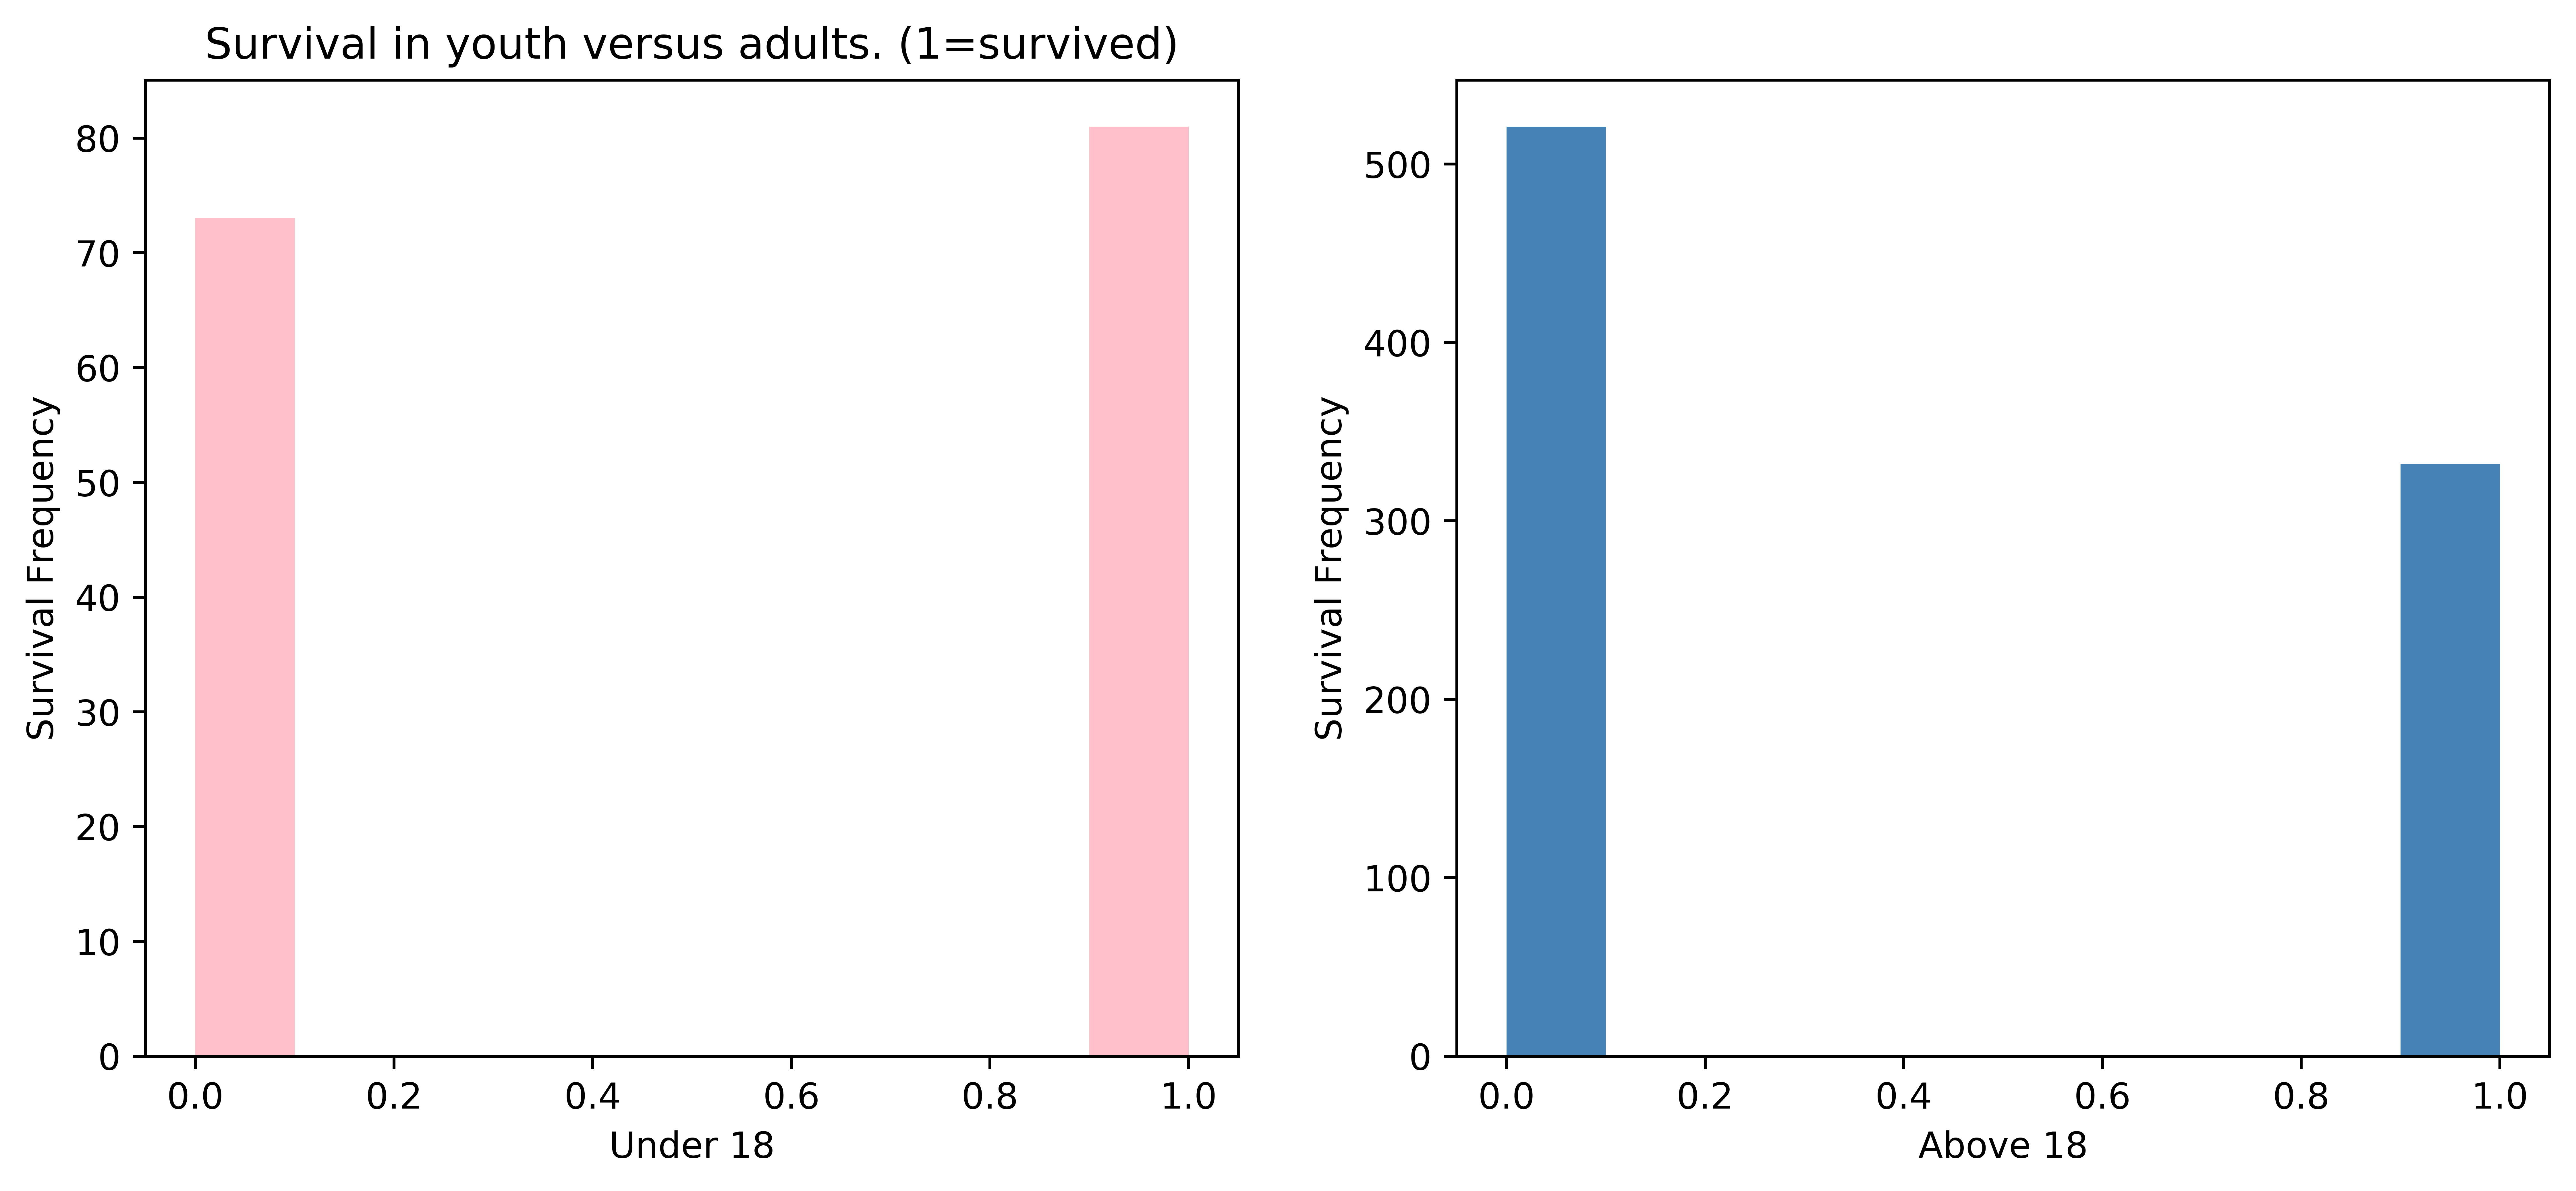

In [551]:
figure333 = plt.figure(figsize=(12,5),dpi=900)
ax12 = figure333.add_subplot(121)
df.survived[df.age < 18].plot(kind='hist', color="pink")
plt.title("Survival in youth versus adults. (1=survived)")
plt.xlabel("Under 18")    
plt.ylabel("Survival Frequency")    

ax13 = figure333.add_subplot(122)
df.survived[df.age > 18].plot(kind='hist', color="steelblue")
plt.xlabel("Above 18")
plt.ylabel("Survival Frequency")    


I will likely later update the dataset to reflect whether or not people having siblings or parents/spouses would have an effect on their survival rate. My suspicion is that the presence of siblings and spouses are simply another proxy for age, primarily. It may be worth looking into later but the primary understanding we gained from this is that young people (under 18), women, and first class passengers were most likely to survive, which frankly matches my original hypothesis.